In [10]:
# Title: EE559 Final Project
# Part 1: ERCOT Summer Peak Demand Forecast by least squares linear regression
# Author: Xinghua Ren, Liyang Zhang

In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# seaborn settings
sns.reset_defaults()
sns.set(color_codes = True)

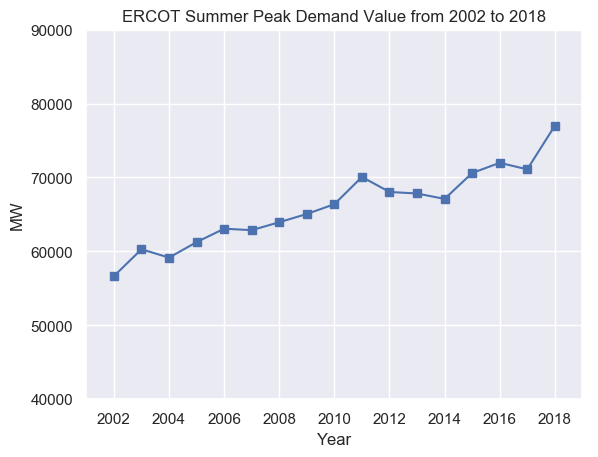

In [12]:
# Data pre-processing and plot

# Read excel files as DataFrame
excel_file = "Summer Non-Coincident Peak Demand.xlsx"
titles = ["Historical Year", "Total NCP"]
data_frame = pd.read_excel(excel_file, usecols = titles)

# Convert the DataFrame to a NumPy array
data_raw = data_frame.to_numpy()

# data_x for years
data_x = data_raw[:, 0]

# data_y for Summer Peak Demand Value of each year
data_y = data_raw[:, 1]

plt.plot(data_x, data_y, marker = "s")
plt.title("ERCOT Summer Peak Demand Value from 2002 to 2018")
plt.xlabel("Year")
plt.ylabel("MW")
plt.axis([2001, 2019, 40000 ,90000])
plt.show()

In [13]:
# function to calculate MAE and MAPE
def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

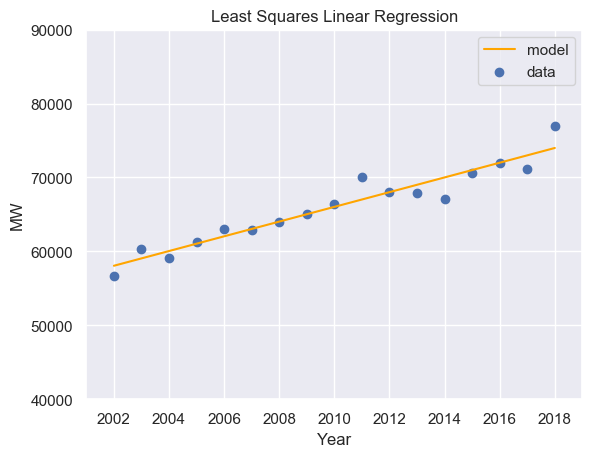

weight value:  [     995.75900246 -1935449.41435591]
MAE:  1051.7874481585416
MAPE:  1.5646836256173926


In [14]:
# Least squares linear regression

# Create array with bias term
x_bias = np.append(np.expand_dims(data_x, axis = 1), np.ones((data_x.shape[0], 1)), axis = 1)

# Calculate weight
w = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(data_y)

x_range = np.arange(np.min(data_x), np.max(data_x) + 1, 1)
x_inputs = np.append(np.expand_dims(x_range, axis = 1), np.ones((x_range.shape[0], 1)), axis = 1)

plt.plot(x_range, x_inputs.dot(w), color = "orange", label = "model")
plt.scatter(data_x, data_y, label = "data")
plt.title("Least Squares Linear Regression")
plt.xlabel("Year")
plt.ylabel("MW")
plt.axis([2001, 2019, 40000 ,90000])
plt.legend()
plt.show()

y_true = data_y
y_pred = x_inputs.dot(w)

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print("weight value: ", w)
print("MAE: ", mae)
print("MAPE: ", mape)

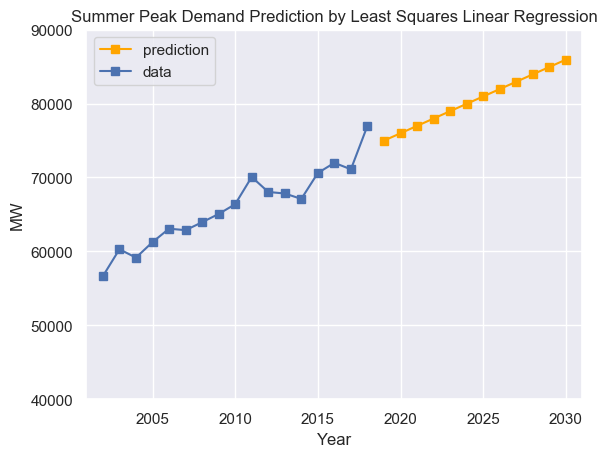

In [15]:
# prediction
x_range_pred = np.arange(2019, 2031, 1)
x_inputs_pred = np.append(np.expand_dims(x_range_pred, axis = 1), np.ones((x_range_pred.shape[0], 1)), axis = 1)

plt.plot(x_range_pred, x_inputs_pred.dot(w), color = "orange", label = "prediction", marker = "s")
plt.plot(data_x, data_y, label = "data", marker = "s")
plt.title("Summer Peak Demand Prediction by Least Squares Linear Regression")
plt.xlabel("Year")
plt.ylabel("MW")
plt.axis([2001, 2031, 40000 ,90000])
plt.legend()
plt.show()

In [16]:
x_pred = np.expand_dims(np.arange(2019, 2031, 1), axis = 1)
y_pred = np.expand_dims(x_inputs_pred.dot(w), axis = 1)
pred_arr = np.concatenate((x_pred, y_pred), axis = 1)
np.set_printoptions(suppress = True)
pred_df = pd.DataFrame(data = pred_arr, columns = ["Year", "Summber Peak Demand"])
print(pred_df)

      Year  Summber Peak Demand
0   2019.0         74988.011611
1   2020.0         75983.770614
2   2021.0         76979.529616
3   2022.0         77975.288619
4   2023.0         78971.047621
5   2024.0         79966.806624
6   2025.0         80962.565626
7   2026.0         81958.324629
8   2027.0         82954.083631
9   2028.0         83949.842633
10  2029.0         84945.601636
11  2030.0         85941.360638
